Neccesary packages to run the project:

In [1]:
import matplotlib.pyplot as plt    # A Python 2D plotting library to produce figures 
import numpy as np                 # Package for scientific computing with Python
from scipy import linalg           # Used to do linear algebra functions
from scipy import optimize         # For maximizing and minimizing functions
import sympy as sm                 # Used to do symbolic mathematics
import ipywidgets as widgets       # Package for making interactive figures
from sympy import *
sm.init_printing(use_unicode=True) # This will make all expressions pretty print with unicode characters.

# Analysis of the Solow 

This project will try to analyse a wide range of Solow models. More specificly the project will try to analyse the models of chapter 3, 5, 6 and 7 from the book "Introducing Advanced Macroeconomics - Growth and business cycles".

## The basic Solow model (Chapter 3)

### Introducing the model

The basic Solow model consists of 4 essential equations which is stated below. 
1. $Y_t = F(K_t^d, L_t^d) = B K_t^\alpha L_t^{1-\alpha}$ 
2. $S_t = sY_t$ 
3. $L_{t+1} = (1+n)L_t$
4. $K_{t+1} - K_t = S_t - \delta K_t$

The model consists of the following variables and parameters:
1. $Y_t$ is GDP which is given as a Cobb-Douglas function.
2. $S_t$ is the amount of saving in the economy and is given as a constant fraction, $0<s<1$, of GDP. 
3. $L_t$ is the amount of labour.
4. $K_t$ is the amount of capital.
5. $B$ is total factor productivity (TFP), $B>0$.
6. $\alpha$ is the share of income/output spent on capital, $0<\alpha<1$

### Analysing the model

In the first part of the analysis of the basic Solow model we find the steady state values for $k_t$ and $y_t$ respectively. In order to do that we use the sympy package which is a great tool for doing symbolic mathematics. We start by defing the symbols of model:

In [2]:
Y = sm.symbols('Y_t')
K = sm.symbols('K_t')
L = sm.symbols('L_t')
y = sm.symbols('y_t')
k = sm.symbols('k_t')
B = sm.symbols('B')
s = sm.symbols('s')
n = sm.symbols('n')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')

### Finding steady state analytical

To find the steady state value of capital per worker we'll use the transition equation:

$k_{t+1} = \frac{1}{1+n} sBk_t^\alpha+(1-\delta)k_t$

The steady state value of capital per worker is given as


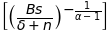

In [3]:
Transtion_equation = sm.Eq(k,(s*B*k**alpha+(1-delta)*k)/(1+n))
kss = sm.solve(Transtion_equation ,k)
print('The steady state value of capital per worker is given as')
kss

To find the steady state value of $y_t$ we firstly define the capital per capita function and then insert our steady state expression for $k^*$ into the output per capita production function:

The steady state value of income per worker is given as


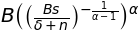

In [4]:
y=B*k**alpha
yss =y.subs({k:kss[0]})
print('The steady state value of income per worker is given as')
yss

We now got an expresison for both capital per worker and income per worker in steady state. In the next part of the analysis we'll find an numerical solution the the steady state values.

### Numerical solution to the model

We'll now find a numerical solution. Firstly, we turn our solution into a Python function

In [5]:
kss_func = sm.lambdify((B,s,n,delta,alpha),kss)

Secondly, we insert some realistic values for our parameters and we find the the steady state value for k.

In [6]:
print('Given our choosen parameters, the steady state value of capital per worker is')
kss_func(5,0.3,0.02,1,1/3)

Given our choosen parameters, the steady state value of capital per worker is


Thirdly, we we find steady state value for y.

In [7]:
yss_func = sm.lambdify((B,s,n,delta,alpha),yss)
print('Given our choosen parameters, the steady state value of income per worker is')
yss_func(5,0.3,0.02,1,1/3)

Given our choosen parameters, the steady state value of income per worker is


### Visualisation of Solow diagram

We'll now try to visualise how capital converges towards it's steady state value.

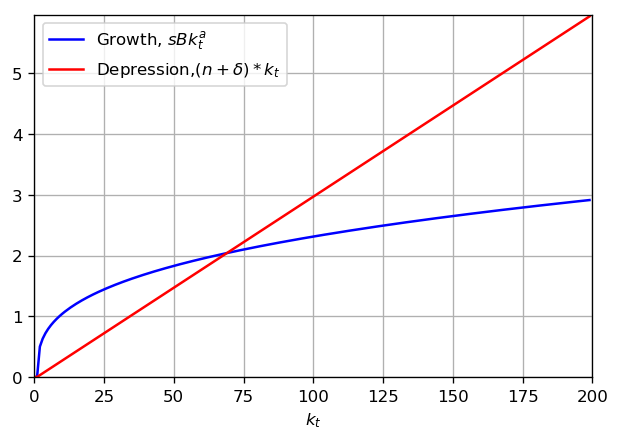

In [47]:
# We define the variables of the Solow diagram
def solowdiagram_basic_solow(k,B,s,n,delta,alpha,T):

# We make two empty lists. One for k and the 45-degree line
    k_next_period = [k]
    Linear_line = [0]
    
# And we create our functions which growths as time goes.
    for t in range(0,T):
        line = (n+delta)*t
        Linear_line.append(line)
        k_plus1 = s*B*t**alpha
        k_next_period.append(k_plus1)

# Plotting figure, limits and labels.
    plt.figure(dpi=120)
    plt.plot(k_next_period[:T], label='Growth, $sBk_t^a$', color='b')
    plt.plot(Linear_line[:T], label = 'Depression,$(n+\delta)*k_t$', color='r')
    plt.xlim(0,T)
    plt.ylim(0,Linear_line[-1])
    plt.xlabel('$k_t$')
    plt.ylabel('')
    plt.grid()
    plt.legend()
    plt.show()
    
# Showing figure. Change yourself to obtain a higher or lower steady state.
solowdiagram_basic_solow(0,1,0.5,0.02,0.01,1/3,200)

The blue line is the growth in capital. On the positive side we have that the higher the savings rate the more capital is accumulated, the higher total factor producitvity the more workers produce and the higher an alpha the higher capitals share is. The red line represents the depreciation. We have that population growth decreases capital per worker. Furthermore, the higher $\delta$ is the more depreciation there is on capital which also decreses capital per worker. You can change the values yourself to move see how the steady state value of capital per worker changes.

The presence of technology in the model allows there to be long-run growth in output per capita. This will conclude the analysis of the basic Solow model. In the next part of the analysis we'll expand the the model by including technologycal growth from the general Solow model.

## The general Solow model (chapter 5)
The next part of the project is going to analyze the Solow model with technology from chapter 5. The model looks a lot like the model from chapter 3 except that the total factor productivity is now being changed with an exogenious technological growth. For a better overview we'll introduce the full model although a lot of the equations is the same as in chapter 3.

### Introducing the model

1. $Y_t = K_t^\alpha (A_t L_t)^{1-\alpha}$ 
2. $S_t = sY_t$
3. $K_{t+1} - K_t = S_t - \delta K_t$
4. $L_{t+1} = (1+n)L_t$ 
5. $A_{t+1} = (1+g)A_t$ 

where $A_{t+1}$ is the growth in technology which is given exogenously as $(1+g)A_t$ and $\tilde{k}_t = \frac{K_t}{A_t L_t}$ and the model has the parameters $\alpha$, $n$, $g$ and $\delta$. The rest of the parameters have been described previously.

### Analysing the model

In the first part of the analysis of the general Solow model we find the marginal product with respect to capital and labour. Following that we'll once again find the steady state values for $k_t$ and $y_t$ respectively. We start by defing the symbols of model.

In [9]:
Y = sm.symbols('Y_t')
y = sm.symbols('y_t')
K = sm.symbols('K_t')
k = sm.symbols('k_t')
A = sm.symbols('A')
s = sm.symbols('s')
n = sm.symbols('n')
g = sm.symbols('g')
L = sm.symbols('L_t')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
kstar = sm.symbols('k_t^*')
ystar = sm.symbols('y_t^*')
ktilde = sm.symbols('ktilde_t')
ytilde = sm.symbols('ytilde_t')
ytildestar = sm.symbols('ytilde_t^*')

### Finding the marginal product with respect to capital and labour

To find the marginal product of capital we take the derivative of the production function with respect to K. Following this we take the derivative of the production function with respect to L to find the the marginal product of labour.

In [10]:
Y = K**alpha*A**(1-alpha)*L**(1-alpha)

r = diff(Y, K)
print('The marginal product of capital which equals the real rental rate is given as')
simplify(r)

The marginal product of capital which equals the real rental rate is given as


This can also be written as:

$r_t = \alpha \left(\frac{K_t}{A_tL_t} \right)^{\alpha-1}$

We find the marginal product with respect to L.

In [11]:
w = diff(Y, L)
print('The marginal product of labour which equals the real wage is given as')
simplify(w)

The marginal product of labour which equals the real wage is given as


Which is an expression for the real wage. This can also be written as:

$w_t = (1-\alpha) \left(\frac{K_t}{A_tL_t} \right)^\alpha A_t$

### Finding steady state analytical

This time we'll take our starting point in the Solow equation which is stated below:

$\tilde{k}_{t+1}-\tilde{k}_t = \frac{1}{(1+n)(1+g)} (s*\tilde{k}_t^\alpha-(n+g+delta+ng)*\tilde{k}_t)$

We know that in steady state $\tilde{k}_{t+1} = \tilde{k}_t = \tilde{k}^*$ which we use to find steady state:

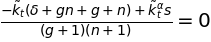

In [12]:
eq = sm.Eq((s*ktilde**alpha-(n+g+delta+n*g)*ktilde)/((1+n)*(1+g)))
eq

We then isolate k which gives us the result $\tilde{k}^*$:

In [13]:
k_tilde_star = sm.solve(eq,ktilde)[0]
k_tilde_star

What we're really interested in is the capital per worker and not technology-adjusted capital per worker. Since $\tilde{k}_t^* = Ak_t^*$ we get the following result:

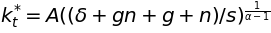

In [14]:
k_star = sm.Eq(kstar, A*k_tilde_star)
k_star

We now got the steady state value for capital per worker. It's quite easy to find $\tilde{y}_t^*$ now since we know that $\tilde{y}_t^* = \tilde{k}_t^\alpha$

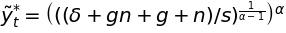

In [15]:
y_tilde_star = sm.Eq(ytildestar, k_tilde_star**alpha)
y_tilde_star

Output per worker is then given as:

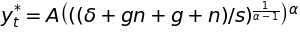

In [16]:
y_star = sm.Eq(ystar, A*k_tilde_star**alpha)
y_star

### Visualization of the general Solow diagram

We visualise the Solow diagram of the model.

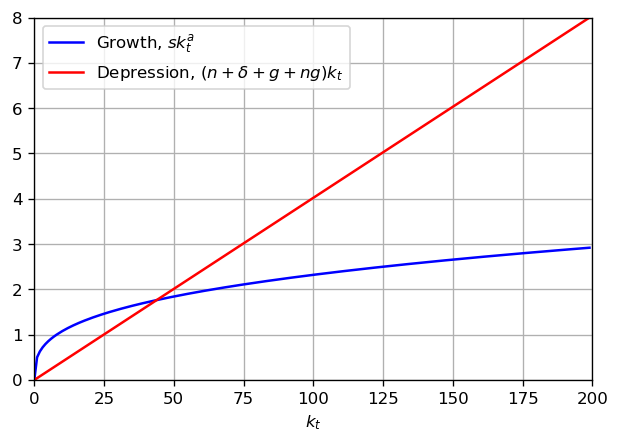

In [48]:
# We define the variabels of the Solow diagram
def solowdiagram_general_solow(k,alpha,delta,s,n,g,T):

# We make a list for k and the 45-degree line. 
    k_next_period = [k]
    Linear_line = [0]
    
# And we create our functions which goes from 1 to infinity which we call T(= time).
    for t in range(1,T):
        line = (n+delta+g+n*g)*t
        Linear_line.append(line)
        k_plus = s*t**alpha
        k_next_period.append(k_plus)
    
# Plotting figure, limits and labels.
    plt.figure(dpi=120)
    plt.plot(k_next_period[:T], label='Growth, $sk_t^a$', color='b')
    plt.plot(Linear_line[:T], label = 'Depression, $(n+\delta+g+ng)k_t$', color='r')
    plt.xlim(0,T)
    plt.ylim(0,Linear_line[-1])
    plt.xlabel('$k_t$')
    plt.ylabel('')
    plt.grid()
    plt.legend()
    plt.show()
    
# Showing figure. Change yourself to obtain a higher or lower steady state.
solowdiagram_general_solow(0,1/3,0.01,0.5,0.02,0.01,200)

We've set the parameters to the same values as before and set $g=0.01$. As before you can change the parameters yourself. Although it might be hard to see, the steady state value of $k_t$ has decreased compared with the model in chapter 3. This is because we now look at the technology-adjusted capital per worker.

Adding technology to the model ensures that there is growth in steady, but also brings it to a lower level. This makes sense as countries that are considered to be in steady state, still experience growth in GDP and GDP per capita. This will conclude the analysis of the general Solow model. 

In the next part of the project we will be focusing on the Solow model from chapter 6 which includes human capital. 

## The Solow model with human capital (Chapter 6)

The third part of our project will focus on the Solow model with human capital. This model addresses the two discrepancies between the empiri and the models predictions.

### The model is given as following,

1. $Y_t = K_t^\alpha  H_t^\varphi (A_t L_t)^{1-\alpha-\varphi}$
2. $L_{t+1} = (1+n)L_t$
3. $A_{t+1} = (1+g)A_t$
4. $H_{t+1} = s_H Y_t + (1+\delta)H_t$
5. $K_{t+1} = s_K Y_t +(1+\delta)K_t$

$r_t = \alpha \left(\frac{K_t}{A_t L_t}\right)^{\alpha-1}\left(\frac{H_t}{A_t L_t}\right)^\varphi A_t$

$w_t = (1-\alpha) \left(\frac{K_t}{A_t L_t}\right)^\alpha \left(\frac{H_t}{A_t L_t}\right)^\varphi A_t$

The model consists of the following variables and parameters:
1. $Y_t$ is GDP, which is given as a Cobb-Douglas function.
2. $L_t$ is the amount of labour. The labour force has a growth rate of 'n'
3. $A_t$ is the technological level and it has a  growth rate of 'g'
4. $K_t$ is the amount of capital.
7. $s_H$ and $s_K$ is the amount of saving in the economy used on respectivly human capital and physical capital. They're both given as a constant fraction of GDP
5. $\sigma$ Physical capitals contribution to GDP growth
6. $\alpha$ Physical capitals contribution to GDP growth

In [51]:
# Defining symbols for sympy 

# period t
K = sm.symbols("K_t")
H = sm.symbols("H_t")
A = sm.symbols("A_t")
L = sm.symbols("L_t")

ktilde = sm.symbols("ktilde_t")
htilde = sm.symbols("htilde_t")
ytilde = sm.symbols("ytilde_t")

# Steady state 
kstar = sm.symbols("ktilde^*")
hstar = sm.symbols("htilde^*")
ystar = sm.symbols("ytilde^*")

# Parameters
phi = sm.symbols("varphi")
sK = sm.symbols("s_K")
sH = sm.symbols("s_H")
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
varphi = sm.symbols('varphi')
g = sm.symbols('g')
n = sm.symbols('n')

In [19]:
# Defining the variables in sympy

# GDP
Y = K**alpha*H**phi*(A*L)**(1-alpha-phi)

# Physical capital
Kt1 = sK*Y +(1-delta)*K

# Human capital
Ht1 = sH*Y +(1-delta)*H

# Technology level and labor force
At1 = (1+g)*A
Lt1 = (1+n)*L

In [20]:
# By differentiation Yt (GDP) respectively for K and L you get the interest rate and the wages in the economy.
r = sm.simplify(sm.diff(Y,K))
w = sm.simplify(sm.diff(Y,L))

In [21]:
# interest rate
r  

The intresrest rate is equivalent to the one shown in the model presentation

$ H_t^\varphi K_t^{\alpha-1}\alpha(A_t L_t)^{-\alpha-\varphi+1} =  
\alpha \left(\frac{K_t}{A-t L_t}\right)^{\alpha-1} \left(\frac{H_t}{A_t L_t}\right)^\varphi$

In [22]:
# real Wages
w

The real wages is equivalent to the one shown in the model presentation
$ \frac{H_t^\varphi K_t^{\alpha}(A_t L_t)^{-\alpha-\varphi+1} (-\alpha-\varphi+1)}{L_t} =  
(1-\alpha) \left(\frac{K_t}{A-t L_t}\right)^{\alpha} \left(\frac{H_t}{A_t L_t}\right)^\varphi A_t$

# Analysing the model (The Law of motion)  
The Transition equation is a bit more complicated than the one in chapter 5 since this model includes two first order differential equations. 
Even so the models are very a like, by setting $\varphi =  1$ and dropping equation 4 the model from chapter 5 appears. 

The technology adjusted variables per effective worker are defined as following:  

$ \tilde{yt}  \equiv \frac{y_t}{A_t}   \equiv \frac{Y_t}{A_tL_t} \hspace 1 cm \tilde{k_t}  \equiv \frac{k_t}{A_t}   \equiv \frac{K_t}{A_tL_t} \hspace 1 cm  \tilde{h_t}  \equiv \frac{h_t}{A_t}   \equiv \frac{H_t}{A_tL_t} $

We derive the technology adjusted variables by dividing both sides of the equations (1), (4) and (5)  by $A_{t+1}*L_{t+1}$ 

In [23]:
# Calculation of the technology adjusted GDP per effective worker - Equation (5) / [(2)(3)]
ytilde = sm.simplify((Y/(A*L)))
ytilde

Per definition the technology adjusted GDP per effective worker can also be expressed as:

$ \tilde y_t = \tilde k_t^\alpha \tilde h_t^\phi$

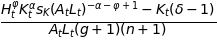

In [24]:
# Calculation of the technology adjusted physical capital per effective worker - Equation (5) / [(2)(3)]
ktildet1 = sm.simplify(Kt1/(At1*Lt1))
ktildet1

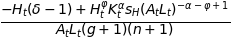

In [25]:
# Calculation of the technology adjusted human capital per effective worker - Equation (4) / [(2)(3)]
htildet1 = sm.simplify(Ht1/(At1*Lt1))
htildet1

By using the definition of $\tilde k_t \hspace 0.3 cm \text and \hspace 0.3 cm  \tilde h_t$ ,  substituting Y into the techonology adjusted human capital and physical capital, it can be reduced to the following functions: 

$\text 6. \hspace 1 cm \tilde k_t = \frac{1}{(1+n)(1+g)} (s_K \tilde k_t^\alpha \tilde h_t^\varphi +(1-\delta)\tilde k_t)\\ 
\text 7. \hspace 1 cm \tilde h_t = \frac{1}{(1+n)(1+g)} (s_h \tilde k_t^\alpha \tilde h_t^\varphi +(1-\delta)\tilde h_t)$

## Finding steady state values for key endogenous variable 

### Step 1, Subtracting $\tilde k_t$ on both sides of equation 6 and subtracting $\tilde h_t$ on both sides of equation 7 to rewrite them to the solow equations


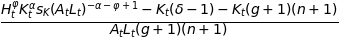

In [26]:
# Defining/calculting the solow equation for physical capital
ksolow = sm.simplify(ktildet1-K/(A*L))
ksolow

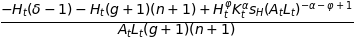

In [27]:
# Defining/calculting the solow equation for human capital
hsolow = sm.simplify(htildet1 - H/(A*L))
hsolow

### Step 2 , In steady state $ \tilde k_{t+1} = \tilde k_t$ and $\tilde h_{t+1} = \tilde h_t,$ so it makes perfect sence to set the equation equal to 0.

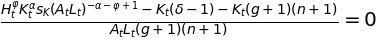

In [28]:
ksolowss= sm.Eq(ksolow)
ksolowss

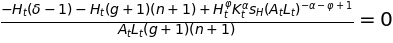

In [29]:
hsolowss = sm.Eq(hsolow)
hsolowss

In [30]:
# By using the definitons listed through out this chapter of the project the two equations above can be reduced to: 

ksolowss1 = sm.Eq(sK*ktilde**alpha*htilde**varphi - (n + g + delta + n*g)*ktilde)
hsolowss1= sm.Eq(sH*ktilde**alpha*htilde**varphi - (n + g + delta + n*g)*htilde)

In [31]:
# The solow equation for physical capital in steady state
ksolowss1

In [32]:
# The solow equation for physical capital in steady state
hsolowss1

### Step 3, isolating $H_t$ and $ K_t$   

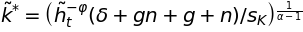

In [33]:
# Finding steady state for physical capital
kss = sm.solve(ksolowss1, ktilde)[0]
kSS = sm.Eq(kstar, sm.solve(ksolowss1, ktilde)[0])
kSS

substituting  $\tilde h^{-\varphi}$ as a fuction of respectivly $\tilde k_t$ 

In [34]:
kss1 = kss.subs(htilde, (ktilde*sH)/sK)
kss2 = sm.Eq(kstar, kss.subs(htilde, (ktilde*sH)/sK))
kss2

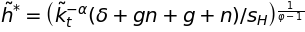

In [35]:
# finding steady state for human capital
hss = sm.solve(hsolowss1, htilde)[0]
hSS = sm.Eq(hstar, sm.solve(hsolowss1, htilde)[0])
hSS

substituting  $\tilde k^{-\alpha}$ as a fuction of $\tilde h_t$

In [36]:
hss1 = hss.subs(ktilde, (htilde*sH)/sK)
hss2 = sm.Eq(hstar, hss.subs(ktilde, (htilde*sH)/sK))
hss2

In [37]:
# substituting steady state variables into technology adjusted GDP per efficient worker

ys = sm.Eq(ystar, kss1**alpha * hss1 **varphi)
ys

# Simulation and visiual presentation of results -  solow with human capital

We now present the model by visualising the Solow diagram.

In [61]:
def simulate_human_capital(sK, sH, g, n, T, alpha, phi, delta, htilde, ktilde): 
    
# Defining arays to contain values of the functions 
    ktilde_movement = [ktilde]
    htilde_movement = [htilde]
    
# Defing functions to add to our arays
    for t in range(1,T):
        ktilde = t
        ktilde_np = ((ktilde**(-alpha+1)*(delta+n*g+n+g))/sK)**(1/(phi))
        ktilde_movement.append(ktilde_np)
        htilde = t
        htilde_np = ((htilde**(-alpha)*(delta+n*g+n+g))/sH)**(1/(phi-1))
        htilde_movement.append(htilde_np)
    
# Setting up the data plot
    plt.figure(dpi=120)
    plt.plot(htilde_movement[:T], label='$\Delta \~{h} = 0$', color='b')
    plt.plot(ktilde_movement[:T], label='$\Delta \~{k} = 0$', color='r')
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.xlabel('$\~{k}$')
    plt.ylabel('$\~{h}$')
    plt.grid()
    plt.legend()
    plt.show()
    
widgets.interact(simulate_human_capital, 
                 htilde = widgets.fixed(0), 
                 ktilde = widgets.fixed(0), 
                 alpha = widgets.FloatSlider(description='$\u03B1$', min=0, max=0.5, step=0.05, value=0.3),
                 phi = widgets.FloatSlider(description='$\u03C6$', min=0, max=0.5, step=0.05, value=0.3), 
                 delta = widgets.FloatSlider(description='$\u03B4$', min=0.01, max=0.1, step=0.01, value=0.01), 
                 sK = widgets.FloatSlider(description='$s_K$', min=0.1, max=0.4, step=0.01, value=0.2), 
                 sH = widgets.FloatSlider(description='$s_H$', min=0.1, max=0.4, step=0.01, value=0.2),
                 n = widgets.FloatSlider(description='$n$', min=0.01, max=0.1, step=0.005, value=0.01), 
                 g = widgets.FloatSlider(description='$g$', min=0.01, max=0.1, step=0.005, value=0.02), 
                 T = widgets.IntSlider(description='$T$', min=1, max=1000, step=10, value=100))

interactive(children=(FloatSlider(value=0.2, description='$s_K$', max=0.4, min=0.1, step=0.01), FloatSlider(va…

<function __main__.simulate_human_capital(sK, sH, g, n, T, alpha, phi, delta, htilde, ktilde)>

As shown in the visual representation by adding an extra parameter, human capital, the convergence towards steady state happens at a slower speed. This means that for an initial amount of human and physical capital, it is going to take a longer amount of time for a country to get to their steady state compared to the previous chapters.

## Solow Model with land (Chapter 7)

In [39]:
import matplotlib.pyplot as plt
from sympy.plotting import plot
import numpy as np                 # Package for scientific computing with Python
from scipy import linalg           # Used to do linear algebra functions
from scipy import optimize         # For maximizing and minimizing functions
import sympy as sm                 # For solving mathematics with symbols 
from sympy import *
from sympy import latex            # Used to print results as LaTeX code
import ipywidgets as widgets
sm.init_printing(use_unicode=True) # This will make all expressions pretty print with unicode characters.

### The model

The model with land consists of the following equations: 

1. $Y_t=K^\alpha_t(A_tL_t)^\beta X^\kappa$,$\hspace{0.5cm}$ $\alpha>0,$ $\hspace{0.5cm}$ $\beta>0$,$\hspace{0.5cm}$$\kappa>0$,$\hspace{0.5cm}$ $\alpha+\beta+\kappa=1$
2. $K_{t+1}=sY_t+(1-\delta)K_t$,$\hspace{0.5cm}$    $0<s<1$,$\hspace{0.5cm}$  $0<\delta<1$.
3. $L_{t+1}=(1+n)L_t$, $\hspace{0.5cm}$  $n \geq 0$.
4. $A_{t+1}=(1+g)A_t$, $\hspace{0.5cm}$ $g \geq 0$.

Where $Y_t$ is output, $K_t$ is capital, $A_t$ is technology, $L_t$ is the population, and $X$ is land (which does not evolve over time). Using the above equations one will arrive at a per-capita output that can be written as: 

$y_t=k_t^\alpha A_t^\beta x_t^\kappa$

Using that $z_t=\frac{k_t}{y_t}$ one gets the following expression: 

$z_t=k_t^{1-\alpha}A_t^{-\beta}x_t^{-\kappa}$

We wish to find the steady state capital-output ratio and this is done by firstly defining the variables which ables us to use the sympy function to do calculations with the variables. 

In [64]:
#defining variables: 
y = sm.symbols('y_t')
Y = sm.symbols('Y_t')
K = sm.symbols('K_t')
k = sm.symbols('k_t')
X = sm.symbols('X')
x = sm.symbols('x_t')
A = sm.symbols('A_t')
L = sm.symbols('L_t')
z = sm.symbols('z_t')
z1 = sm.symbols('z_t+1')
A1 = sm.symbols('A_t+1')
L1 = sm.symbols('L_t+1')
x1 = sm.symbols('x_t+1')
k1 = sm.symbols('k_t+1')
K1 = sm.symbols('K_t+1')
n = sm.symbols('n')
s = sm.symbols('s')
g = sm.symbols('g')
S = sm.symbols('z^*')
kappa = sm.symbols('kappa',positive = True)
alpha = sm.symbols('alpha', positive = True)
beta = sm.symbols('beta',positive = True)
delta = sm.symbols('delta',positive = True)

In [65]:
cap_out = sm.Eq(z,(k**(1-alpha)*A**(-beta)*x**(-kappa))) 
cap_out 

In [42]:
#Redifining the equation to t+1 by substituting
cap_out = cap_out.subs(z,z1)
cap_out = cap_out.subs(A,A1)
cap_out = cap_out.subs(k,k1)
cap_out = cap_out.subs(x,x1)
cap_out

Inserting that $k_{t+1}=\left(\frac{K_{t+1}}{L_{t+1}}\right)$  and $x_{t+1}=\left(\frac{X}{L_{t+1}}\right)$ and also inserting equations 2, 3 and 4 from the model one gets:

$z_{t+1}=\left( \frac{sY_t+(1-\delta)K_t}{(1+n)L_t}  \right)^{1-\alpha}(1+g)^{-\beta}A_t^{-\beta}\left(   \frac{X}{(1+n)L_t} \right)^{-\kappa}$

$=\left(\frac{1}{(1+n)(1+g)}\right)^\beta(sy_t+(1-\delta)k_t)^{1-\alpha}A_t^{-\beta}x_t^{-\kappa}$

$=\left(\frac{1}{(1+n)(1+g)}\right)^\beta \left( s\frac{y_t}{k_t}+(1-\delta)\right)^{1-\alpha}k_t^{1-\alpha} A_t^{-\beta}x_t^{-\kappa}$

Lastly inserting $z_t=k_t^{1-\alpha}A_t^{-\beta}x_t^{-\kappa}$ one arrives at: 

$=\left(\frac{1}{(1+n)(1+g)}\right)^\beta \left(\frac{s}{z_t}+(1-\delta)\right)^{1-\alpha}z_t$

This can finally be written as: 

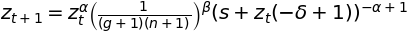

In [43]:
#Creating a sympy equation
Transition = sm.Eq(z1, (1/((1+n)*(1+g)))**beta*(s+(1-delta)*z)**(1-alpha)*z**alpha)
Transition

The sympy solve for function gives an error when trying to isolate $z_t$ which is known to be a common error when solving equations with powers. Therefore the isolating is done by brute-force setting $z_{t+1}=z_t=z^*$ : 

$z_t^{1-\alpha}=\left(\frac{1}{(g+1)(n+1)}\right)^\beta (s+z_t(-\delta+1))^{1-\alpha}$

$z_t=\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s+z_t(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}$

$z_t-z_t(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}=\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s$

$z_t\left(1-(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}\right)=\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s$

$z_t=\frac{\left(\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s\right)}{\left(1-(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}\right)}$

$z_t^{-1}=\frac{\left(1-(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}\right)}{\left(\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s\right)}$

$z_t^{-1}=\frac{1}{\left(\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s\right)}-\frac{(-\delta+1)\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}}{\left(\left(\frac{1}{(g+1)(n+1)}\right)^\frac{\beta}{1-\alpha}s\right)}$

$z_t^{-1}=\frac{((1+n)(1+g))^{\frac{\beta}{1-\alpha}}}{s}-\frac{(-\delta+1)}{s}$

$z_t=\frac{s}{((1+n)(1+g))^{\frac{\beta}{1-\alpha}}-(-\delta+1)}$

This can then be denoted as $z^*$ for steady state: 

$z^*=\frac{s}{((1+n)(1+g))^{\frac{\beta}{1-\alpha}}-(-\delta+1)}$




Furthermore by using that $1-\alpha=\beta+\kappa$ we can substitute this into the steady state function: 

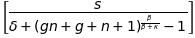

In [44]:
ss = sm.Eq(S, (((s)/((((1+n)*(1+g))**(beta/(1-alpha)))-(-delta+1)))))
ss = ss.subs(1-alpha, beta+kappa) #inserting beta+kappa for 1-alpha
ssz = sm.solve(ss, S) #solving the equation for steady state capital-output ratio
ssz

In [45]:
ssz_func = sm.lambdify((s,delta,g,n,beta,kappa),ssz) #Turning the variables into a python function
ssz_func(0.25, 0.05, 0.02, 0.01, 0.6, 0.2)

So the model (with the reasonable parameter values) suggests that an economy in steady state has a capital-output ratio of around 3.445. 

### Visualization of convergence to steady state

Using the transition equation for the capital-output ratio from earlier, a diagram showing the convergence to the steady state value of 3.445 will be illustrated in the following section: 

In [67]:
# Here the intervals for the different parameters are defined 
s = np.arange(0,1)
z = np.arange(100)
beta = np.arange(0,1)
delta = np.arange(0,0.1)
n = np.arange(0,0.2)
g = np.arange(0,0.04)
alpha = np.arange(0,1)

def interactive_transition1(z,s,beta,delta,n,g,alpha):
    #Defines the capital-output ratio and a 45 degree line
    z0 = (((1)/((1+n)*(1+g)))**beta*(s+((1-delta)*z))**(1-alpha)*z**alpha) 
    m0 = z 

    fig = plt.figure(dpi=120, figsize=[4,4])
    ax = fig.add_subplot(1,1,1)
    ax.plot(z0, label = 'Capital/output')         #plots the capital-output function and the 45degree line
    ax.plot(m0, label = '45 degrees line')  
    ax.set_xlim([0,100]) # fixed x range          #sets limits for the axis
    ax.set_ylim([0,100]) # fixed y range 
    plt.xlabel('z in period t')                   #Creates x- and y-axis 
    plt.ylabel('z in period t+1')
    plt.title('Transition diagram')               #Creates title for the diagram
    ax.grid()                                 #Makes a grid on the graph
    ax.legend(loc='upper left')

    fig = plt.figure(dpi=120, figsize=[4,4])
    ax = fig.add_subplot(1,1,1)
    ax.plot(z0, label = 'Capital/output')
    ax.plot(m0, label = '45 degrees line')  
    ax.set_xlim([3,4]) # fixed x range            #sets limits for the axis
    ax.set_ylim([3,4]) # fixed y range 
    plt.xlabel('z in period t')                   #Creates x- and y-axis 
    plt.ylabel('z in period t+1')
    plt.title('Transition diagram (zoomed in)')   #Creates title for the diagram
    ax.grid()                                 #Makes a grid on the graph
    ax.legend(loc='upper left')
 
    #Defining the intervals and step sizes for the sliders
widgets.interact(interactive_transition1,
    s=widgets.FloatSlider(description="$s$", min=0, max=1, step=0.005, value=0.25),
    beta=widgets.FloatSlider(description="$beta$", min=0, max=1, step=0.005, value=0.6),
    delta=widgets.FloatSlider(description="$delta$", min=0, max=0.1, step=0.005, value=0.05),
    n=widgets.FloatSlider(description="$n$", min=0, max=0.2, step=0.01, value=0.01),
    g=widgets.FloatSlider(description="$g$", min=0, max=0.04, step=0.001, value=0.02),
    alpha=widgets.FloatSlider(description="$alpha$", min=0, max=1, step=0.005, value=0.2),
    z=widgets.fixed(z));

interactive(children=(FloatSlider(value=0.25, description='$s$', max=1.0, step=0.005), FloatSlider(value=0.6, …

From the above visual representation of the convergence to the capital-output steady state, one can see that the intersection point lies at around 3.5, which was also what we saw when calculating the steady state value based on given parameters. In comparison to the US, they had a capital-output ratio of 3.04 in 2015$^{(1)}$. This is relatively close to that of the model, where parameters that arguably could fit an OECD country were picked. A parameter like the savings rate however is arguable set a bit high for that of the US, where a lower savings rate, would make the model result come even closer the the capital-output ratio of the US. 

$^{(1)}$ "Financial Times, Andrew Smithers - February 25, 2015 - https://www.ft.com/content/97337405-66fb-3391-b92c-4c244db5f8c0" 

### Steady state output growth path and the effect of land

The steady state output growth path can be found using the steady state capital-output ratio and the per capita output function form earlier: 

$y_t=k_t^\alpha A_t^\beta x_t^\kappa$

$y_t^{1-\alpha}=\frac{k_t^\alpha A_t^\beta x_t^\kappa}{y_t^\alpha}$

$y_t^{1-\alpha}=\frac{k_t^\alpha}{y_t^\alpha} A_t^\beta x_t^\kappa$

${y_t^*}^{1-\alpha}= (z^*)^\alpha A_t^\beta x_t^\kappa$

$y_t^*= (z^*)^{\frac{\alpha}{1-\alpha}} A_t^{\frac{\beta}{1-\alpha}} x_t^{\frac{\kappa}{1-\alpha}}$

$y_t^*= (z^*)^{\frac{\alpha}{1-\alpha}} A_t^{\frac{\beta}{1-\alpha}} \left(\frac{X}{L_t}\right)^{\frac{\kappa}{1-\alpha}}$

$y_t^*= (z^*)^{\frac{\alpha}{1-\alpha}} A_0^{\frac{\beta}{1-\alpha}} \left(\frac{X}{L_0}\right)^{\frac{\kappa}{1-\alpha}}(1+g)^{\frac{\beta}{1-\alpha}}(1+n)^{\frac{-\kappa}{1-\alpha}}$


Where one sees that the model suggests that land contributes positively to the steady state per capita output. Comparing to the solow model where technology was introduced (chapter 5) one will see that the technological growth has a smaller contribution to the output per capita in steady state. However setting $\kappa=0$ (rather unrealistic when assuming that land does have and effect) will give the steady state output per capita, that was found for chapter 5. So the contribution that land brings to the steady state per capita output in relation to the chapter 5 model, resides from technology, making the direct effect from development in technology lesser. 

## Conclusion

The goal of this project was to see how the basic solow model compares to extensions of the model with technology, human capital and land. For the model with technology one saw that adding technology ensured that there could be growth in output per capita in steady state. This makes sense as countries that are considered to be in steady state, still experience growth in GDP and GDP per capita. In the next part of the project the model with human capital was analysed. Here one saw that the convergence towards steady state happens at a slower pace than for the general solow model. In the final part of the project the model with land was looked at and here one saw that land has a positive effect on output per capita. However this positive effect resides from the contribution from technological growth making that lesser. 